In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
b = pd.read_csv("combined.csv",low_memory=False).drop(columns=["Unnamed: 0"])

In [28]:
b

,type,purpose,preapproval,construction_method,occupancy,loan_amount,action,state,county,tract,...,gender,american_indian,asian,black,pi,nhw,hispanic,not_hispanic,senior,denied
0,1,1,2,1,3,75000,1,FL,12031.0,1.203101e+10,...,unk,0,0,0,0,0,0,0,unk,0
1,1,1,2,1,3,35000,1,IL,17031.0,1.703168e+10,...,unk,0,0,0,0,0,0,0,unk,0
2,1,1,2,1,3,165000,1,FL,12031.0,1.203102e+10,...,unk,0,0,0,0,0,0,0,unk,0
3,1,1,2,1,3,45000,1,FL,12127.0,1.212708e+10,...,unk,0,0,0,0,0,0,0,unk,0
4,1,1,2,1,3,125000,1,VT,50027.0,5.002797e+10,...,unk,0,0,0,0,0,0,0,unk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192107,1,4,2,1,1,5005000,1,CA,6059.0,6.059063e+09,...,unk,0,0,0,0,0,0,0,unk,0
1192108,1,1,2,1,3,4205000,1,MD,24510.0,2.451004e+10,...,unk,0,0,0,0,0,0,0,unk,0
1192109,1,32,2,1,1,5525000,1,CA,6083.0,6.083002e+09,...,unk,0,0,0,0,0,0,0,unk,0
1192110,1,31,2,1,2,805000,1,CA,6037.0,6.037194e+09,...,unk,0,0,0,0,0,0,0,unk,0


In [4]:
b.columns

Index(['type', 'purpose', 'preapproval', 'construction_method', 'occupancy',
       'loan_amount', 'action', 'state', 'county', 'tract', 'income',
       'purch_type', 'rate_spread', 'HOEPA', 'lien', 'cscore_type_bor',
       'cscore_type_cobor', 'denial_reason1', 'total_cost', 'orig_charges',
       'discount_points', 'lender_credits', 'interest_rate', 'prepay_penalty',
       'dti', 'cltv', 'term', 'intro_rate_period', 'balloon', 'io_payment',
       'neg_amort', 'other_non_amort', 'property_value', 'manuf_prop_type',
       'manuf_prop_interest', 'units', 'mf_units', 'submit_type', 'iptyi',
       'aus1', 'reverse_mort', 'oeloc', 'business_purpose', 'year', 'bank',
       'gender', 'american_indian', 'asian', 'black', 'pi', 'nhw', 'hispanic',
       'not_hispanic', 'senior', 'denied'],
      dtype='object')

In [6]:
for col in b.loc[:,"american_indian":"not_hispanic"]:
    b.loc[b[col]==True,col] = 1
    b.loc[b[col]==False,col] = 0
    b[col] = b[col].astype(int)


In [7]:
b.loc[b["denied"]==True,"denied"] = 1
b.loc[b["denied"]==False,"denied"] = 0
b["denied"] = b["denied"].astype(int)

In [8]:
b

,type,purpose,preapproval,construction_method,occupancy,loan_amount,action,state,county,tract,...,gender,american_indian,asian,black,pi,nhw,hispanic,not_hispanic,senior,denied
0,1,1,2,1,3,75000,1,FL,12031.0,1.203101e+10,...,unk,0,0,0,0,0,0,0,unk,0
1,1,1,2,1,3,35000,1,IL,17031.0,1.703168e+10,...,unk,0,0,0,0,0,0,0,unk,0
2,1,1,2,1,3,165000,1,FL,12031.0,1.203102e+10,...,unk,0,0,0,0,0,0,0,unk,0
3,1,1,2,1,3,45000,1,FL,12127.0,1.212708e+10,...,unk,0,0,0,0,0,0,0,unk,0
4,1,1,2,1,3,125000,1,VT,50027.0,5.002797e+10,...,unk,0,0,0,0,0,0,0,unk,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192107,1,4,2,1,1,5005000,1,CA,6059.0,6.059063e+09,...,unk,0,0,0,0,0,0,0,unk,0
1192108,1,1,2,1,3,4205000,1,MD,24510.0,2.451004e+10,...,unk,0,0,0,0,0,0,0,unk,0
1192109,1,32,2,1,1,5525000,1,CA,6083.0,6.083002e+09,...,unk,0,0,0,0,0,0,0,unk,0
1192110,1,31,2,1,2,805000,1,CA,6037.0,6.037194e+09,...,unk,0,0,0,0,0,0,0,unk,0


Text(0.5, 1.0, 'Proportion of mortgage applicants by race/ethnicity')

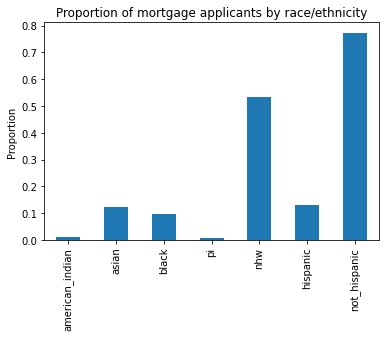

In [9]:
b.loc[:,"american_indian":"not_hispanic"].mean().plot(kind="bar")
plt.ylabel("Proportion")
plt.title("Proportion of mortgage applicants by race/ethnicity")

## Remove nulls

In [10]:
b.isnull().sum()

type                         0
purpose                      0
preapproval                  0
construction_method          0
occupancy                    0
loan_amount                  0
action                       0
state                      133
county                    6336
tract                     6336
income                   38690
purch_type                   0
rate_spread             486277
HOEPA                        0
lien                         0
cscore_type_bor              0
cscore_type_cobor            0
denial_reason1               0
total_cost              704857
orig_charges            704729
discount_points        1042684
lender_credits          990874
interest_rate           442999
prepay_penalty          791266
dti                      17374
cltv                      8467
term                        97
intro_rate_period       602381
balloon                      0
io_payment                   0
neg_amort                    0
other_non_amort              0
property

In [11]:
#Columns with more than 50% nulls
drop_col = ["rate_spread","total_cost","orig_charges","discount_points","lender_credits","interest_rate","prepay_penalty",
           "intro_rate_period","mf_units","senior","reverse_mort","denial_reason1","action"]

#question: senior? that could be relevant
#reverse_mort only has 1 value


In [12]:
c=b.drop(columns=drop_col).dropna()
c

,type,purpose,preapproval,construction_method,occupancy,loan_amount,state,county,tract,income,...,bank,gender,american_indian,asian,black,pi,nhw,hispanic,not_hispanic,denied
78,3,1,2,1,1,305000,WA,53053.0,5.305306e+10,92.0,...,NFCU,joint,0,0,0,0,0,1,0,0
79,2,1,1,2,1,105000,GA,13045.0,1.304591e+10,37.0,...,NFCU,joint,0,0,0,0,1,0,1,0
80,1,1,1,1,1,1195000,VA,51107.0,5.110761e+10,461.0,...,NFCU,male,0,0,0,0,1,0,1,0
81,1,1,1,1,1,365000,VA,51630.0,5.163000e+10,178.0,...,NFCU,joint,0,0,0,0,1,0,1,0
82,1,1,1,1,1,775000,MD,24021.0,2.402175e+10,239.0,...,NFCU,joint,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192090,2,1,2,1,1,95000,SC,45079.0,4.507901e+10,74.0,...,BOA,unk,0,0,0,0,0,0,0,0
1192091,1,31,2,1,1,305000,CA,6037.0,6.037215e+09,92.0,...,BOA,female,0,0,0,0,1,0,1,0
1192096,1,1,2,1,1,65000,VA,51810.0,5.181005e+10,35.0,...,BOA,female,0,0,0,0,1,0,1,0
1192097,1,31,2,1,1,3505000,TX,48209.0,4.820901e+10,1646.0,...,BOA,joint,0,0,0,0,1,0,1,1


In [13]:
c.columns

Index(['type', 'purpose', 'preapproval', 'construction_method', 'occupancy',
       'loan_amount', 'state', 'county', 'tract', 'income', 'purch_type',
       'HOEPA', 'lien', 'cscore_type_bor', 'cscore_type_cobor', 'dti', 'cltv',
       'term', 'balloon', 'io_payment', 'neg_amort', 'other_non_amort',
       'property_value', 'manuf_prop_type', 'manuf_prop_interest', 'units',
       'submit_type', 'iptyi', 'aus1', 'oeloc', 'business_purpose', 'year',
       'bank', 'gender', 'american_indian', 'asian', 'black', 'pi', 'nhw',
       'hispanic', 'not_hispanic', 'denied'],
      dtype='object')

## Process categorical variables

In [14]:
strlist = [str(i) for i in range(36,50)]
c.loc[c.dti.isin(strlist), "dti"] = "36%-49%"

One-hot encoding

In [21]:
#One-hot encoding

#I don't know if it's okay to leave county and tract as numbers because they're not numeric
#but one-hot encoding counties is too many columns

categorical_vars = ["type","purpose","occupancy","state","bank","gender","purch_type","HOEPA","cscore_type_bor",
           "cscore_type_cobor","dti","balloon","io_payment","neg_amort","other_non_amort","manuf_prop_type",
                    "manuf_prop_interest","units","submit_type","iptyi","aus1","oeloc","business_purpose"]

def one_hot_encode(X, names):
    X2 = X
    X2 = X2.drop(columns=names)
    for i in names:
        values = X[i].unique()
        for j in values:
           X2[(str(i)+"_"+str(j))] = (X[i]==j)*1
        
    return X2

data = one_hot_encode(c, categorical_vars) 


In [23]:
data.to_csv("one_hot_encoded_all.csv", index=False)

In [29]:
smaller = data.sample(100000)
smaller.to_csv("one_hot_encoded_100k.csv", index=False)

In [24]:
pd.read_csv("one_hot_encoded_all.csv")

,preapproval,construction_method,loan_amount,county,tract,income,lien,cltv,term,property_value,...,aus1_1,aus1_6,aus1_3,aus1_2,aus1_4,aus1_5,oeloc_2,oeloc_1,business_purpose_2,business_purpose_1
0,2,1,305000,53053.0,5.305306e+10,92.0,1,100.00,360.0,305000.0,...,1,0,0,0,0,0,1,0,1,0
1,1,2,105000,13045.0,1.304591e+10,37.0,1,96.49,360.0,115000.0,...,1,0,0,0,0,0,1,0,1,0
2,1,1,1195000,51107.0,5.110761e+10,461.0,1,86.43,360.0,1405000.0,...,1,0,0,0,0,0,1,0,1,0
3,1,1,365000,51630.0,5.163000e+10,178.0,1,101.74,360.0,365000.0,...,1,0,0,0,0,0,1,0,1,0
4,1,1,775000,24021.0,2.402175e+10,239.0,1,100.00,360.0,805000.0,...,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142242,2,1,95000,45079.0,4.507901e+10,74.0,1,96.50,360.0,95000.0,...,0,0,1,0,0,0,1,0,1,0
1142243,2,1,305000,6037.0,6.037215e+09,92.0,1,17.10,360.0,1755000.0,...,0,1,0,0,0,0,1,0,1,0
1142244,2,1,65000,51810.0,5.181005e+10,35.0,2,66.50,360.0,195000.0,...,0,1,0,0,0,0,0,1,1,0
1142245,2,1,3505000,48209.0,4.820901e+10,1646.0,1,80.50,180.0,4355000.0,...,0,1,0,0,0,0,1,0,1,0


Vars without one-hot encoding (for OCT)

In [15]:
#categorical variables
categorical_cols = ["type","purpose","occupancy","county","tract","purch_type","HOEPA","cscore_type_bor",
           "cscore_type_cobor","dti","balloon","io_payment","neg_amort","other_non_amort","manuf_prop_type",
                    "manuf_prop_interest","units","submit_type","iptyi","aus1","oeloc","business_purpose"]

In [16]:
for col in categorical_cols:
    c[col] = c[col].astype(str)

In [17]:
# For pasting into Julia CSV.read for Optimal Classification Trees

typeslist = []
for col in c.dtypes.values:
    if col=='O':
        typeslist.append("String")
    elif col=="int64" or col=="int32":
        typeslist.append("Int64")
    else:
        typeslist.append("Float64")

for t in typeslist:
    print(t+",")

String,
String,
Int64,
Int64,
String,
Int64,
String,
String,
String,
Float64,
String,
String,
Int64,
String,
String,
String,
Float64,
Float64,
String,
String,
String,
String,
Float64,
String,
String,
String,
String,
String,
String,
String,
String,
Int64,
String,
String,
Int64,
Int64,
Int64,
Int64,
Int64,
Int64,
Int64,
Int64,


In [31]:
c.to_csv("combined_noNA.csv",index=False)